# Project: Investigate a Dataset - TMDB MOVIES

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question">Questions for Analysis</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project, I explore various factors that influence the success of movies using a dataset collected from **The Movie Database (TMDb)**. The dataset contains detailed information about **10,000 movies**, including their **budgets**, **revenues**, **genres**, **directors**, and **user ratings**. I will explore the relationships between these movie attributes and their financial success.


### Dataset Overview

This dataset contains information about 10,000 movies, including attributes like budget, revenue, genres, and popularity. Each movie is represented by a single row in the dataset. Here is a list of the key columns in the dataset and their description:

#### Column Names and Significance:

- **`id`**: Unique identifier for each movie.
- **`imdb_id`**: Unique identifier for the movie on IMDb.
- **`popularity`**: TMDb’s measure of the movie’s popularity.
- **`budget`**: The production budget of the movie (in dollars).
- **`revenue`**: The total revenue generated by the movie (in dollars).
- **`original_title`**: The original title of the movie.
- **`cast`**: A list of the main actors in the movie, separated by a pipe (|) character.
- **`homepage`**: The official website of the movie, if available.
- **`director`**: The director of the movie.
- **`tagline`**: A brief marketing slogan for the movie.
- **`overview`**: A summary of the movie's plot.
- **`runtime`**: The length of the movie (in minutes).
- **`genres`**: A list of genres associated with the movie, separated by a pipe (|) character.
- **`production_companies`**: The companies that produced the movie.
- **`release_date`**: The date the movie was released.
- **`vote_count`**: The number of votes the movie received from users.
- **`vote_average`**: The average user rating (out of 10) based on votes.
- **`release_year`**: The year the movie was released.
- **`budget_adj`**: The movie's budget adjusted for inflation (in 2010 dollars).
- **`revenue_adj`**: The movie's revenue adjusted for inflation (in 2010 dollars).

<a id="question"></a>
## Questions for Analysis:
I will explore the following questions through data analysis and visualizations:
1. **What is the relationship between a movie’s budget and its revenue?**
2. **Does movies genres impact revenue?**
3. **What impact does the director have on the revenue of a movie?**
4. **What is the relationship between a movie's popularity and revenue?**

In [34]:
# import neccessary libraries

import pandas as pd
import numpy as np

<a id='wrangling'></a>
## Data Wrangling


In [35]:
# Load data and print out a few lines
df_tmdb = pd.read_csv('./Database_TMDb_movie_data/tmdb-movies.csv')
df_tmdb.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [36]:
# Check the column, datatype and non-null count
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [37]:
# summary of the dataset to understand data sample
df_tmdb.describe

<bound method NDFrame.describe of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4             

In [38]:
# Getting a sense for the count of missing data in dataset
missing_data = df_tmdb.isnull().sum()
missing_data[missing_data>0]

imdb_id                   10
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64

In [39]:
## Assess the nature of the data in the columns that will be used in the analysis
## popularity, budget, revenue , director, genre, vote_count, vote_average, budget_adj, revenue_adj        

In [40]:
df_tmdb.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Data Assessment
- Dropping the following columns from the dataset, they contain missing values and are not relevant to the analysis
    - **`cast`**, 
    - **`homepage`**
    - **`tagline`**
    - **`keywords`**
    - **`overview`**
- Dropping rows with null values in ( non-null values are needed for analysis): 
    - **`director`**
    - **`genres`**
- Create list columns for columns with multiple data in the column seperated by "|"
    - **`genres`** e.g. Action|Adventure|Science Fiction|Thriller
    - **`director`** e.g Andrew Adamson|Kelly Asbury|Conrad Vernon
- Convert to string the following for clarity and easier manipulation:
    - **`genres`**
    - **`director`** 


### Data Cleaning

In [41]:
# Drop the following columns cast, homepage, tagline, keyword, overview
df_tmdb.drop(['homepage','cast','tagline','keywords','overview'], axis=1, inplace=True)

In [42]:
# Drop the rows with null values in director and genres
df_tmdb.dropna(subset=['director', 'genres'], inplace=True)

In [43]:
# Convert to string genres, director
df_tmdb[['director', 'genres']] = df_tmdb[['director', 'genres']].astype('string')

In [44]:
#create a list column given a column with multiple values
def create_list_column(column_name):
    return df_tmdb[column_name].str.split('|')

In [45]:
# Create genres list column from genres
df_tmdb['genres_list'] = create_list_column('genres')

In [46]:
# Create director list column from director
df_tmdb['director_list'] = create_list_column('director')

<a id='eda'></a>
## Exploratory Data Analysis

### Descriptive Statistics

In [47]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10801.000000,10801.000000,1.080100e+04,1.080100e+04,10801.000000,10801.000000,10801.00000,10801.000000,1.080100e+04,1.080100e+04
mean,65574.018609,0.649450,1.471255e+07,4.006196e+07,102.188779,218.590686,5.97079,2001.290343,1.765551e+07,5.167244e+07
std,91752.107716,1.002395,3.098568e+07,1.173144e+08,30.782604,577.139279,0.93301,12.819226,3.438265e+07,1.450123e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.50000,1960.000000,0.000000e+00,0.000000e+00
25%,10571.000000,0.209163,0.000000e+00,0.000000e+00,90.000000,17.000000,5.40000,1995.000000,0.000000e+00,0.000000e+00
50%,20465.000000,0.385492,0.000000e+00,0.000000e+00,99.000000,39.000000,6.00000,2006.000000,0.000000e+00,0.000000e+00
75%,74725.000000,0.717479,1.577495e+07,2.453851e+07,111.000000,147.000000,6.60000,2011.000000,2.103337e+07,3.408478e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.20000,2015.000000,4.250000e+08,2.827124e+09


##### Popularity:
With a mean of 0.649 and a standard deviation of 1.002 the data suggests that most have low popularity scores with a few outliers driving up the average

##### Adjusted Budget:
With a mean of 14.7 million dollars  and a standard deviation of 30.99 million dollars the data suggests that a significant number of moves are low budget with few massive budget movie (max of 425 million dollars) 

##### Adjusted Revenue:
With a mean of 40 million dollars and a standard deviation of 117 million dollars the data suggests a large variability in movie revenue. Similar to budget, most movies generate moderate revenue with a few outliers driving up the (max of 425 million dollars)

Most of the data shows relatively modest average values for budgets, revenues and popularity, with the median often  lower than the mean. This indicates while most movies have lower values, and only a few blockbusters significantly push the averages up.

### What is the relationship between a movie’s budget and its revenue?

In [48]:
%matplotlib inline

In [49]:
# Calculate and print the Pearson correlation coefficient
def calculate_correlation(df, x_column, y_column):
    pearson_cc = df[x_column].corr(df[y_column])
    print(f'Pearson Correlation Coefficient is {pearson_cc:.3f}')

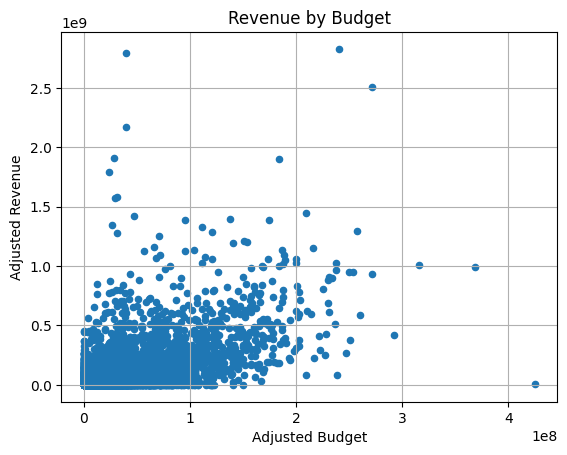

In [50]:
df_tmdb.plot(kind='scatter', x='budget_adj', y='revenue_adj',
            xlabel='Adjusted Budget',ylabel='Adjusted Revenue',
            title='Revenue by Budget',legend=False, grid=True);

In [51]:
# Calculate the Pearson correlation coefficient
calculate_correlation(df_tmdb, "budget_adj", "revenue_adj")

Pearson Correlation Coefficient is 0.646


##### Revenue by Budget
The scatter plot shows a generally upwward trend indicating that movies with higher budgets tend to ear higher revenues. Also the Pearson coefficient is positive (0.646) meaning that as the budget of a movie increases the revenue tends to increase as well. The value of 0.646 is a moderate to strong correlation.

### Does movies genres impact revenue?

In [52]:
#Explode list of genres into seperate rows
df_tmdb_genres = df_tmdb.explode('genres_list')

In [53]:
#Group by genre and calculate average the revenue
df_tmdb_genres_revenue = df_tmdb_genres.groupby('genres_list')['revenue_adj'].mean().reset_index()

In [54]:
#rename columns
df_tmdb_genres_revenue.columns = ['genre', 'average_revenue']

In [55]:
#sort by average revenue
df_tmdb_genres_revenue.sort_values(by=['average_revenue'], ascending=False, inplace=True)

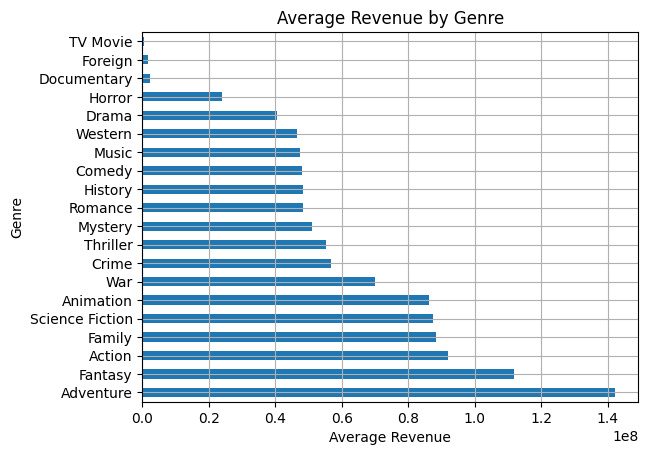

In [57]:
## Plot horizontal bar chart
df_tmdb_genres_revenue.plot(kind='barh',
                            x='genre', y='average_revenue',
                            xlabel='Average Revenue',
                            ylabel='Genre',
                            title='Average Revenue by Genre',
                            legend=False, grid=True);

##### Average Revenue by Genre
The plot shows genres do have a significant impact on revenue. Certain genres consistently perform better in terms of average revenue. Action, adventure, and fantasy movies generate higher revenues while genres like documentaries and foreign movies tend to perform less well financially. The plot provides clear evidence that different genres exhibit varying levels of financial performance

### What impact does the director have on the financial success of a movie?

In [28]:
#Explode list of directors into seperate rows
df_tmdb_director = df_tmdb.explode('director_list')

In [29]:
#Group by genre and calculate average the revenue
df_tmdb_director_revenue = df_tmdb_director.groupby('director_list').agg(
                            total_revenue=('revenue_adj', 'sum'),
                            average_revenue=('revenue_adj', 'mean')).reset_index()

In [30]:
# Rename columns for easy handling
df_tmdb_director_revenue.columns = ['director','total_revenue', 'average_revenue']

In [31]:
#Get the top 20 average earning directors - too many directors in the list so narrowed to top 20
df_tmdb_top_directors = df_tmdb_director_revenue.sort_values(by='average_revenue', ascending=False).head(20)

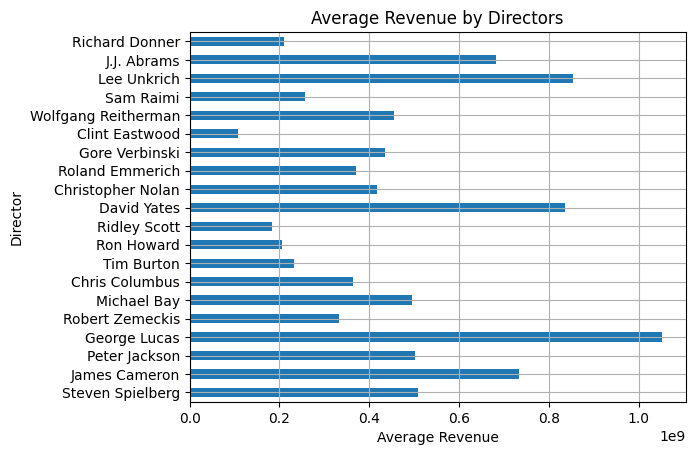

In [58]:
df_tmdb_top_directors.plot(kind='barh', x='director', y='average_revenue', 
                           ylabel='Director', xlabel='Average Revenue',
                            title='Average Revenue by Directors',
                            legend=False, grid=True);

##### Average Revenue by Directors
This plots the financial performance of directors, the top 20 directors in terms of average revenue are highlighted, giving insight into how directors are a crucial in a movie's box office success. It reveals that certain directors consistently lead financially successful movies.

In [33]:
#Get the top 20 total earnings directors - too many directors in the list so narrowed to top 20
df_tmdb_top_directors = df_tmdb_director_revenue.sort_values(by='total_revenue', ascending=False).head(20)

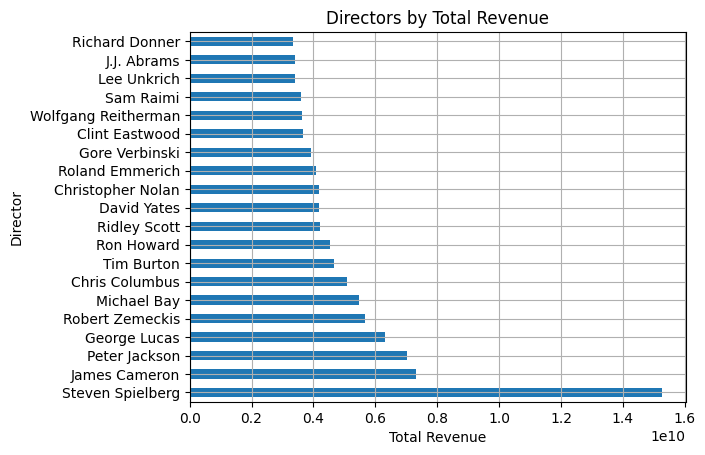

In [86]:
df_tmdb_top_directors.plot(kind='barh', x='director', y='total_revenue', 
                           ylabel='Director', xlabel='Total Revenue',
                            title='Total Revenue by Director',
                            legend=False, grid=True);

##### Total Revenue by Director
The plot shows that certain directors have contributed significantly to the total revenues of movies than others. These directors have typically directed more commercially successful movies and it showcases the impact of directors on the revenue performance of movies

### What is the correlation between popularity and the financial success of a movie?

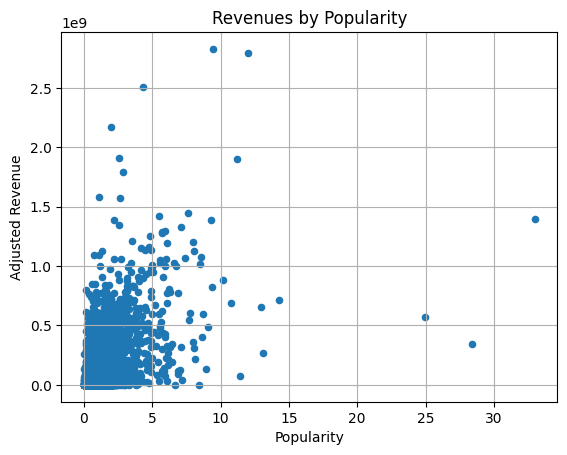

In [87]:
df_tmdb.plot(kind='scatter', x="popularity", y="revenue_adj",
              xlabel='Popularity', ylabel='Adjusted Revenue',
                            title='Revenues by Popularity',
                            legend=False, grid=True);
             

In [33]:
calculate_correlation(df_tmdb, 'popularity', 'revenue_adj')

Pearson Correlation Coefficient is 0.609


##### Revenue by Popularity
The scatter plot shows a positive trend, where movies with higher popularity tend to generate higher adjusted revenue. The calculated Pearson correlation coefficient of 0.609 confirms the visual trend observed in the scatter plot, this is expected, as more popular movies likely attract larger audiences, resulting in higher box office earnings.

<a id='conclusions'></a>
## Conclusions

#### Relationship Between Budget and Revenue
There was a positive correlation between a movie's budget and its revenue. Movies with higher budgets tend to generate higher revenues, though the strength of this relationship is moderate to strong. Certain high-budget films still underperformed while some lower budget moves had good financial returns, impliyinig other factors could influence revenue.

While many blockbusters had high budgets, certain lower-budget films in popular genres (e.g., horror, comedy) managed to outperform higher-budget films, suggesting that budget alone is not the sole driver of success

#### Impact of Genres on Revenue
Genres like Adventure, Fantasy, Action, Family, and Science Fiction, generally had higher average revenue in this dataset while genres like drama and documentaries tend to have lower revenues. Dramas and comedies had a wide range of revenue outcomes, with some performing extremely well while others underperformed significantly

It is however challenging to isolate the effect of a single genre since there are many multi-genre movies in the dataset. The effect of multiple genres and genre combinationations should be explored to understand how genres influence revenue.

#### Director's Impact on Revenue
At first I examined the average earning and was surprised that well know directors like Steven Spielberg and Christopher Nolan were not in the top 20 so I looked at the total earnings as well. This leads me to think it might be complicated to attribute success solely to the director and other factors might need to be incorporated to get a better picture of the director's role.

The success of movies by well-known directors often eclipsed those of lesser-known directors indicating the director may have an effect on audience expectations and box office outcomes.

#### Popularity and Revenue
There appears to be a positive correlation between a movie's popularity and it's revenue although there were some cases where that was not the case. It would be great to have some information on how this value is arrived at.

### Limitations
- Many movies span multiple genres, making it difficult to isolate the impact of a single genre on revenue
- Statistical models could help quantify the relationship between the factors examine and revenue more precisely.
- Genre combinations should be explored to see how different pairings influence revenue.
- Certain blockbuster films or outlier directors may disproportionately impact the analysis, making it difficult to generalize findings to all movies.
- While correlations between factors (e.g., budget and revenue) are observed, causality is difficult to establish due to the influence of external factors

    #### Potential Biases or Uncertainties:
    - Director Bias: High-profile directors may have access to larger budgets and better marketing resources, creating an indirect link between their reputation and revenue that is difficult to isolate.
    - Popularity Measurement: Popularity can be influenced by various factors, such as marketing budgets or social media presence, which may not directly reflect the quality of the movie.
   
    #### Areas for Further Exploration:
    - Analysis of Marketing Efforts: Investigating how marketing budgets correlate with popularity and revenue could further clarify the observed trends.
    - Deeper Dive into Genre: Conducting a more granular analysis of genre combinations (e.g., action-comedy, horror-thriller) could offer insights into successes.

In [17]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 342577 bytes to Investigate_a_Dataset.html
